In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customer = pd.read_csv("/content/drive/MyDrive/Zeotap/Customers.csv")
product = pd.read_csv("/content/drive/MyDrive/Zeotap/Products.csv")
transaction = pd.read_csv("/content/drive/MyDrive/Zeotap/Transactions.csv")

In [9]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [10]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [11]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# 1) Custer Trends
* Analyze SignupDate to determine trends in customer acquisition over time and identify any seasonal patterns or effects of marketing campaigns.

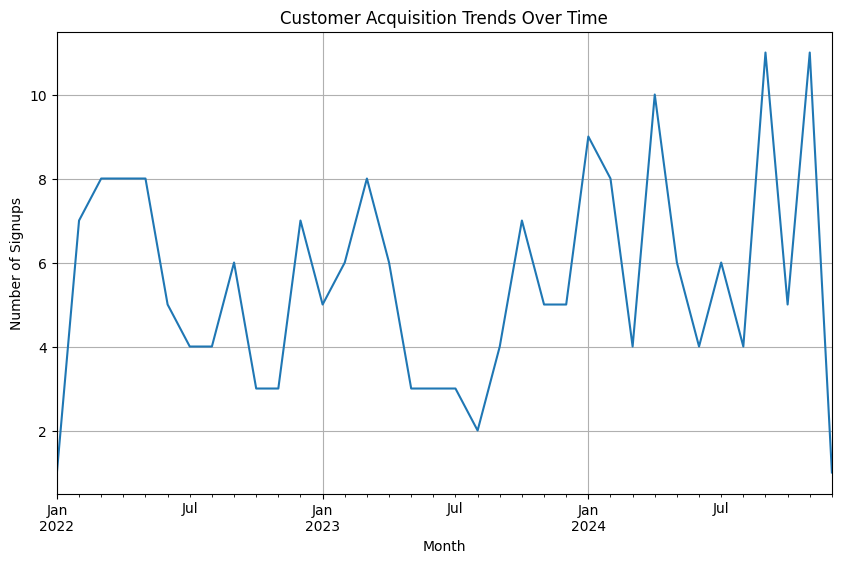

In [22]:

# Plotting the trend of customer signups
customer.groupby(customer['SignupDate'].dt.to_period('M')).size().plot(kind='line', figsize=(10, 6))
plt.title('Customer Acquisition Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()


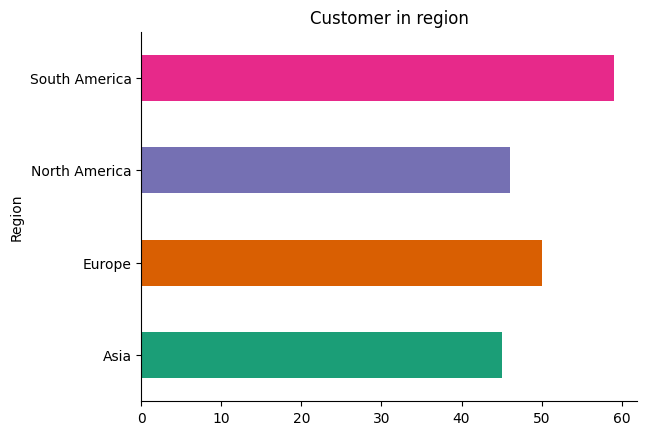

In [21]:

customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
customer.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Customer in region')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# 2) Sales Performance by Region:
* Evaluate which regions are performing best in terms of sales volume and revenue, and suggest targeted marketing strategies for underperforming regions.

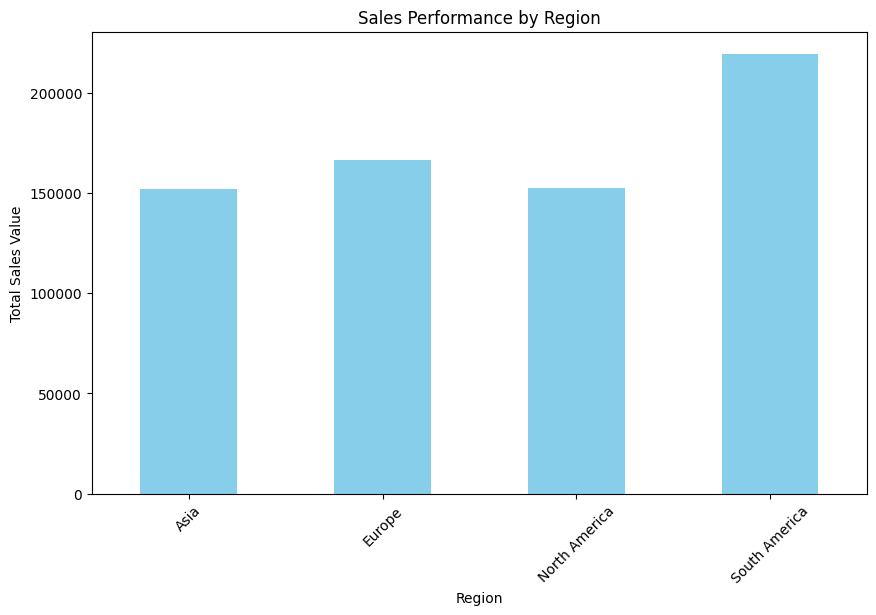

In [5]:
merged_data = pd.merge(transaction, customer, on='CustomerID')

# Summing up sales by region
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()

# Plotting
sales_by_region.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()

# 3)Product Category Analysis:
* Identify which categories are most popular and generate the most revenue, aiding in inventory management and promotional focuses.

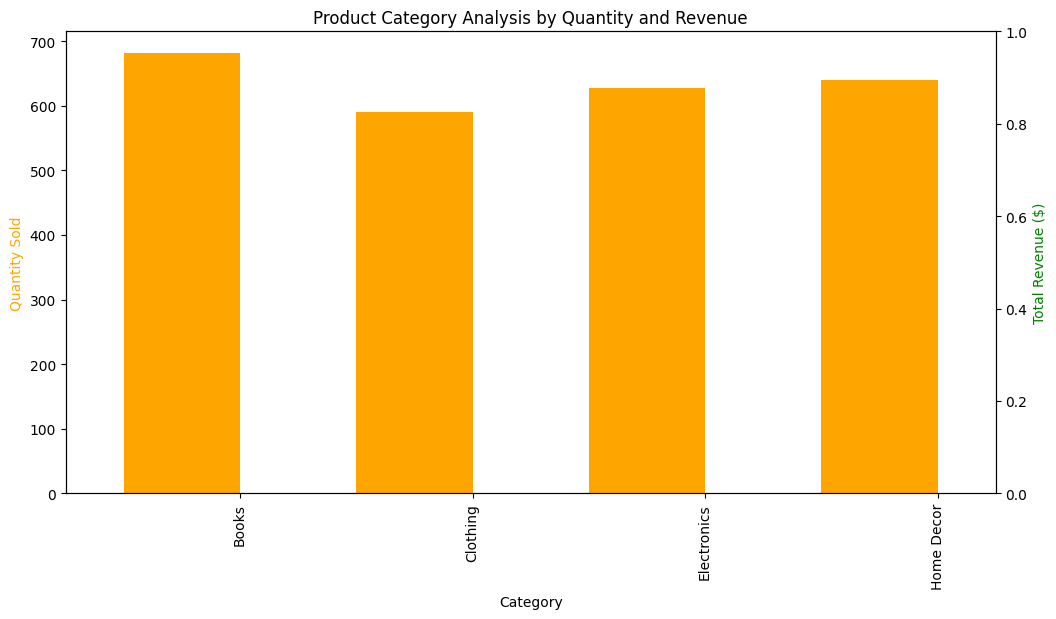

In [7]:
# Merge data
merged_data = pd.merge(transaction, product, on='ProductID')

# Aggregate data by category
category_sales = merged_data.groupby('Category').agg({'Quantity': 'sum', 'TotalValue': 'sum'})

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
category_sales['Quantity'].plot(kind='bar', color='orange', ax=ax1, position=1)
ax2 = ax1.twinx()
# category_sales['TotalValue'].plot(kind='line', marker='o', color='g', ax=ax2)

ax1.set_title('Product Category Analysis by Quantity and Revenue')
ax1.set_xlabel('Category')
ax1.set_ylabel('Quantity Sold', color='orange')
ax2.set_ylabel('Total Revenue ($)', color='g')
plt.show()

# 4) Pricing Strategy Effectiveness:
* Assess how Price affects sales volumes across different categories to optimize pricing strategies.

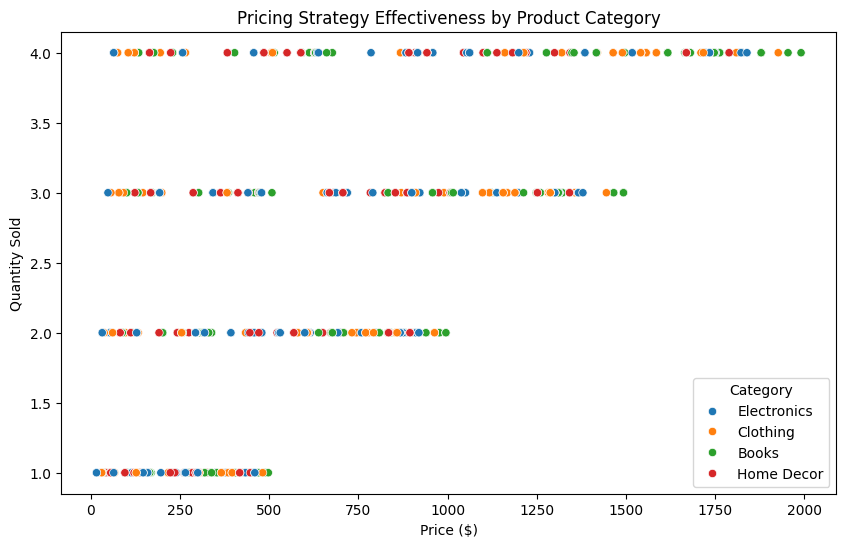

In [15]:
# Merge data
merged_data_Pricing = pd.merge(transaction, product, on='ProductID')
# merged_data_Pricing.head()
# Scatter plot to visualize price vs quantity sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data_Pricing, x='TotalValue', y='Quantity', hue='Category')
plt.title('Pricing Strategy Effectiveness by Product Category')
plt.xlabel('Price ($)')
plt.ylabel('Quantity Sold')
plt.show()

# 5) Customer Loyalty and Repeat Business:
* Examine if repeat transactions are more common in certain regions or product categories, and suggest loyalty programs or promotions to boost repeat purchases.

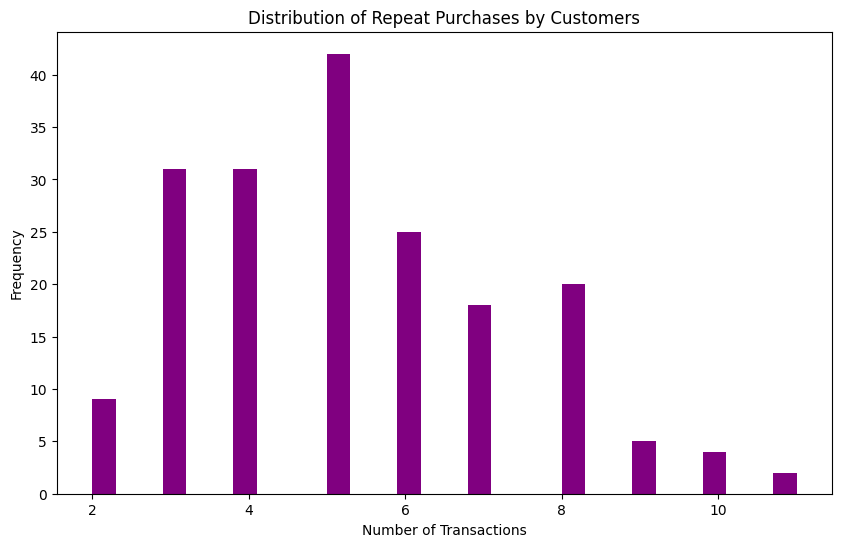

In [16]:
# Counting the number of transactions per customer
repeat_customers = transaction['CustomerID'].value_counts()

# Filter to get customers with more than one purchase
repeat_customers = repeat_customers[repeat_customers > 1]

# Plotting
repeat_customers.plot(kind='hist', bins=30, color='purple', figsize=(10, 6))
plt.title('Distribution of Repeat Purchases by Customers')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()